In [1]:
#Erez Sarousi
#Professor Werner
#DSC550 Data Mining
#Bellevue University
#4/23/2021

In [394]:
#Explanation of project and graphs.
M1 = open("Milestone1.txt", "r")
M1 = M1.read()
print(M1)

For this project, I will be a data scientist within Apple for a hypothetical scenario in which I will evaluate the overall response of reviews of a previous model of the iPhone from the dataset sourced from the Amazon website. Specifically, this will be iPhone 8, which came out in 2017.

I will be finding out what features of the phones work and which ones do not. There are different aspects and columns, which make up this project. Some of these columns include the ASIN number, the review title, review body, the date, the helpful review counter and prices paid. My hope is that by thorough investigation, we can learn more about the phones.

This would be helpful for the company because if we wanted to improve upon our products and improve customer satisfaction (to inevitably retain business and maximize profits), we would need to realize both what weâ€™re doing right (so we can continue doing so), and also what weâ€™re doing wrong, so we know how to allocate our research and development

In [351]:
#Loading packages
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

In [94]:
#Loading dataframes.
items = pd.read_csv('20191226-items.csv')
reviews = pd.read_csv('20191226-reviews.csv')

In [95]:
#examining the first dataframe.
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [96]:
#examining the second dataframe.
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [277]:
#finding all Apple entries within the first df
AP = items['title'].str.lower().str.find('iphone 8')!=-1

In [278]:
#Seeing how many matches exist.
AP.sum()

9

In [279]:
#creating a new df based on the search.
items_df = items.loc[AP]

In [280]:
#Seeing the list of different options.
pd.set_option('display.max_colwidth', None)
items_df['url']

306    https://www.amazon.com/Apple-iPhone-Unlocked-Smartphone-Refurbished/dp/B076KC34PM
311                 https://www.amazon.com/Apple-iPhone-GSM-Unlocked-256GB/dp/B07753NSQZ
313          https://www.amazon.com/Apple-iPhone-Unlocked-Gray-Refurbished/dp/B07755LZ67
314         https://www.amazon.com/Apple-iPhone-Fully-Unlocked-Refurbished/dp/B07756QYST
315                https://www.amazon.com/Apple-iPhone-Fully-Unlocked-64GB/dp/B0775717ZP
316                  https://www.amazon.com/Apple-iPhone-GSM-Unlocked-64GB/dp/B077578VXH
388                  https://www.amazon.com/Apple-iPhone-Plus-Verizon-64GB/dp/B07CGMQDXW
420                https://www.amazon.com/Apple-iPhone-AT-64GB-Refurbished/dp/B07G7FG26S
459         https://www.amazon.com/Apple-iPhone-a1905-Unlocked-Refurbished/dp/B07HKQ61NV
Name: url, dtype: object

In [376]:
#merging the two dataframes based on the asin.
apple = pd.merge(items_df,reviews, on='asin')
#Dropping nan values.
apple = apple.dropna()

In [377]:
#Reviewing the new dataframe
apple.head()

,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B076KC34PM,Apple,"Apple iPhone 8 64GB GSM Unlocked Smartphone, RED (Renewed)",https://www.amazon.com/Apple-iPhone-Unlocked-Smartphone-Refurbished/dp/B076KC34PM,https://m.media-amazon.com/images/I/61XjpQucvyL._AC_UY218_ML3_.jpg,4.1,https://www.amazon.com/product-reviews/B076KC34PM,26,334.98,499.99,Ray97,1,"April 18, 2019",True,Broke down within 3-5 days,"At first I had nice things too say about this phone but have after 3-5 days of use... not anymore. After some days of use I’ve noticed it started too randomly reboot on me when I would be doing the most random things such as switching from my Pandora app too my Snapchat app. Also not only does it reboot on me randomly but it does a reboot loop and it can go on anywhere from 5 mins - 30 minutes. I’ve tried several things after googling this issue too try and fix it myself and no good results, even giving it a factory reset/restore from iTunes app on my laptop didn’t work.",17.0
1,B076KC34PM,Apple,"Apple iPhone 8 64GB GSM Unlocked Smartphone, RED (Renewed)",https://www.amazon.com/Apple-iPhone-Unlocked-Smartphone-Refurbished/dp/B076KC34PM,https://m.media-amazon.com/images/I/61XjpQucvyL._AC_UY218_ML3_.jpg,4.1,https://www.amazon.com/product-reviews/B076KC34PM,26,334.98,499.99,Blake,1,"May 14, 2019",True,Phone didn’t work right.,The phone was defective. It would work as normal and then suddenly begin restarting itself. My LTE constantly went in and out and phone said no service. Switched to Verizon thinking maybe it was MetroPCS. Nope. The phone is messed up it isnt even really usable. Very frustrating....,7.0
2,B076KC34PM,Apple,"Apple iPhone 8 64GB GSM Unlocked Smartphone, RED (Renewed)",https://www.amazon.com/Apple-iPhone-Unlocked-Smartphone-Refurbished/dp/B076KC34PM,https://m.media-amazon.com/images/I/61XjpQucvyL._AC_UY218_ML3_.jpg,4.1,https://www.amazon.com/product-reviews/B076KC34PM,26,334.98,499.99,María Gabriela Saponare,5,"April 15, 2019",True,original,"Works perfectly. Great conditions. It wasn't in the original package and didn't bring the earphones, but other than that, great deal!",7.0
3,B076KC34PM,Apple,"Apple iPhone 8 64GB GSM Unlocked Smartphone, RED (Renewed)",https://www.amazon.com/Apple-iPhone-Unlocked-Smartphone-Refurbished/dp/B076KC34PM,https://m.media-amazon.com/images/I/61XjpQucvyL._AC_UY218_ML3_.jpg,4.1,https://www.amazon.com/product-reviews/B076KC34PM,26,334.98,499.99,laurakobold,1,"February 24, 2019",True,Audio,The Iphone has problems with the audio,8.0
4,B076KC34PM,Apple,"Apple iPhone 8 64GB GSM Unlocked Smartphone, RED (Renewed)",https://www.amazon.com/Apple-iPhone-Unlocked-Smartphone-Refurbished/dp/B076KC34PM,https://m.media-amazon.com/images/I/61XjpQucvyL._AC_UY218_ML3_.jpg,4.1,https://www.amazon.com/product-reviews/B076KC34PM,26,334.98,499.99,jessica,5,"April 14, 2019",True,The best purchase ever!,Awesome product! Really saved a great sum of money! Does not come with headphones but the price is an absolute steal! The overall condition is like a new iPhone!,6.0


In [378]:
#Deleting erroneous columns.
del apple['image']
del apple['url']
del apple['reviewUrl']
del apple['price']
del apple['name']
del apple['rating_x']

In [379]:
#Renaming columns.
apple.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple['Date'] = pd.to_datetime(apple['Date']) #Reformatting date/time format.
apple.sample(n=5)

,Item #,Brand,Model,Reviews,Price,Rating,Date,Verified,Review Title,Review,Helpful
319,B07HKQ61NV,Apple,Apple iPhone 8 a1905 64GB LTE GSM Unlocked (Renewed),29,328.97,2,2019-11-24,True,trash,the mic on my doesent work.,1.0
231,B07756QYST,Apple,"Apple iPhone 8, 64GB, Silver - Fully Unlocked (Renewed)",1,0.00,1,2018-07-11,True,Not really GSM Unlocked!,Was told by Customer Service there was no way to unlock the phone and that it was GSM unlocked as stated. I contacted Apple who checked the number and found it was still registered to AT&T. I logged in and unlocked it from AT&T but this was not GSM unlocked. It was an AT&T phone. Hope the phone works better than Jem Jem's indifferent customer service.,90.0
103,B07755LZ67,Apple,Apple iPhone 8 Plus 64GB Unlocked GSM Phone - Space Gray (Renewed),176,0.00,1,2019-03-07,True,Defective on arrival,Phone came with defective screen. A simple quality control test would have found this before being shipped. Now I'm without a phone for a week while I await a replacement.,7.0
234,B0775717ZP,Apple,"Apple iPhone 8, 64GB, Gold - Fully Unlocked (Renewed)",1,0.00,5,2018-07-03,True,Good quality for being refurbished,"Despite the basic packaging, I was quite impressed with the condition of the phone, it looked brand new without a single scratch, which was one of my main concerns, when purchasing a refurbished phone. It also came with nicely packaged; headphones, aux adapter cable, and a charger. What I like the most about this purchase, was the fact that it was SIM unlocked(read some reviews saying it wasn’t). I was able to insert my AT&T SIM card and have it work immediately without any complications, I was able to call/text people within minutes of activating the phone. I’ve only had this phone for a week now and so far nothing seems to raise any red flags yet, I’ll update my review if anything changes.",309.0
53,B07753NSQZ,Apple,"Apple iPhone 8, GSM Unlocked, 256GB - Space Gray (Renewed)",96,379.99,1,2019-08-17,True,No good,No good,1.0


In [380]:
#Infomation about the numerical columns.
apple.describe()

,Reviews,Price,Rating,Helpful
count,146.000000,146.000000,146.000000,146.000000
mean,87.869863,172.041918,2.986301,45.452055
std,70.759356,195.723844,1.875381,87.345535
min,1.000000,0.000000,1.000000,1.000000
25%,18.500000,0.000000,1.000000,2.000000
50%,72.000000,0.000000,4.000000,5.000000
75%,176.000000,328.970000,5.000000,39.750000
max,176.000000,499.990000,5.000000,416.000000


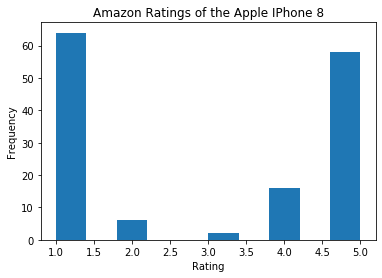

In [381]:
#Graph 1: Histogram for ratings
plt.hist(apple['Rating'])
plt.title("Amazon Ratings of the Apple IPhone 8")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

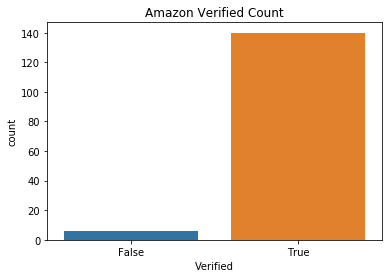

In [382]:
#Graph 2: Histogram for ratings
plt.title('Amazon Verified Count')
sns.countplot(x="Verified", data=apple)

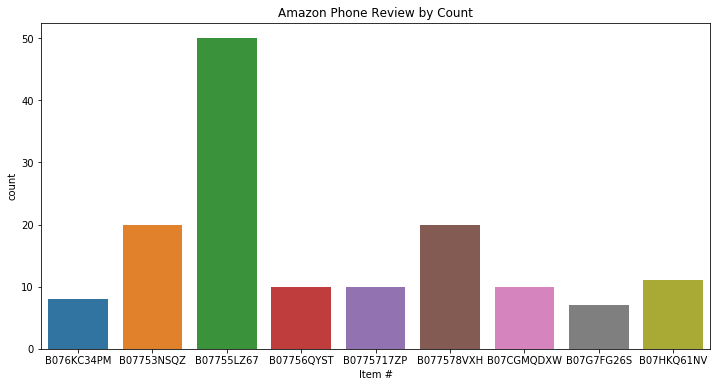

In [390]:
#Graph 3: Item # Count Plot
plt.figure(figsize=(12, 6)) #adjusting the size so it's easily seen.
plt.title('Amazon Phone Review by Count')
sns.countplot(x="Item #", data=apple)

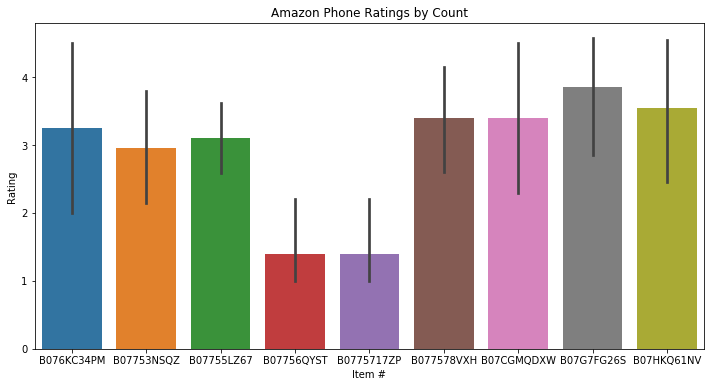

In [389]:
#Graph 3: Item # Count Plot
plt.figure(figsize=(12, 6)) #adjusting the size so it's easily seen.
plt.title('Amazon Phone Ratings by Count')
sns.barplot(x="Item #",y='Rating', data=apple)